<a href="https://colab.research.google.com/github/PritamSShetty/Bike-Sharing/blob/main/Customer_Churn_In_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [268]:
df = pd.read_csv('churn.csv')

In [269]:
df.shape

(10000, 14)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [271]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [272]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking the Imbalace in Dataset

In [273]:
df.Exited.value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In dataset, approx 80% data is of customer who have continued with the bank and 20% who have exited the bank

<Axes: >

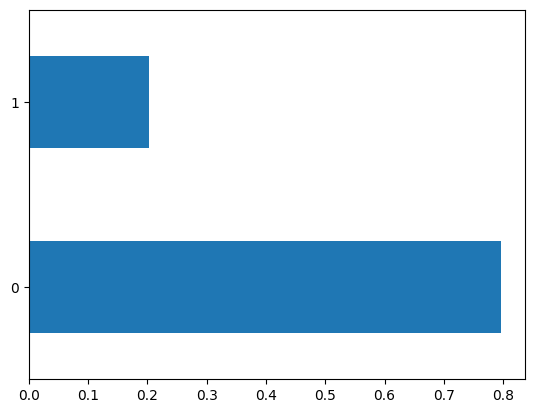

In [274]:
df.Exited.value_counts(normalize = True).plot.barh()

Columns like Row NUmber, CustomerID and Surname ar not useful in model building. 

Hence dropping the column

In [275]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace = True)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [277]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [278]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [279]:
df.NumOfProducts.unique()

array([1, 3, 2, 4])

In [280]:
df.HasCrCard.unique()

array([1, 0])

In [281]:
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['Geography', 'Gender'], dtype='object')

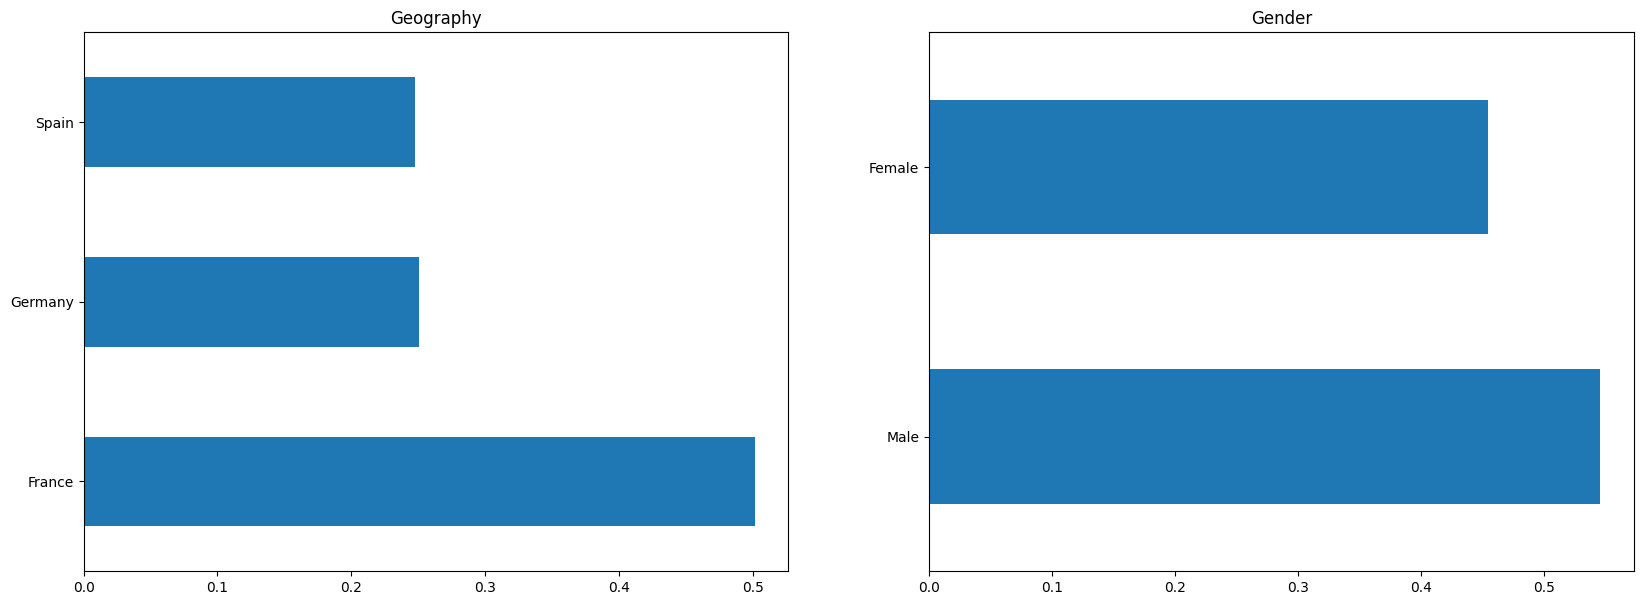

In [282]:
plt.figure(figsize=[20,7])
for ind, col in enumerate(cat_cols):
    plt.subplot(1,2,ind+1)
    df[col].value_counts(normalize=True).plot.barh()
    plt.title(col)
plt.show()

<Axes: >

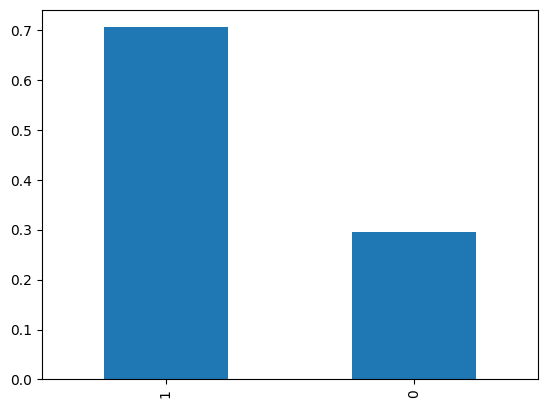

In [283]:
df.HasCrCard.value_counts(normalize = True).plot.bar()

<Axes: >

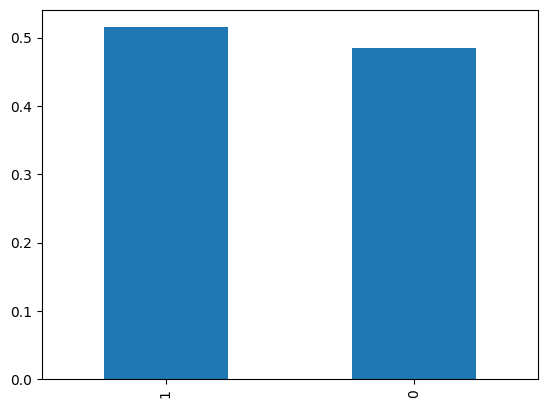

In [284]:
df.IsActiveMember.value_counts(normalize = True).plot.bar()

In [285]:
num_cols = df[['CreditScore','Age','Tenure']]
num_cols

,CreditScore,Age,Tenure
0,619,42,2
1,608,41,1
2,502,42,8
3,699,39,1
4,850,43,2
...,...,...,...
9995,771,39,5
9996,516,35,10
9997,709,36,7
9998,772,42,3


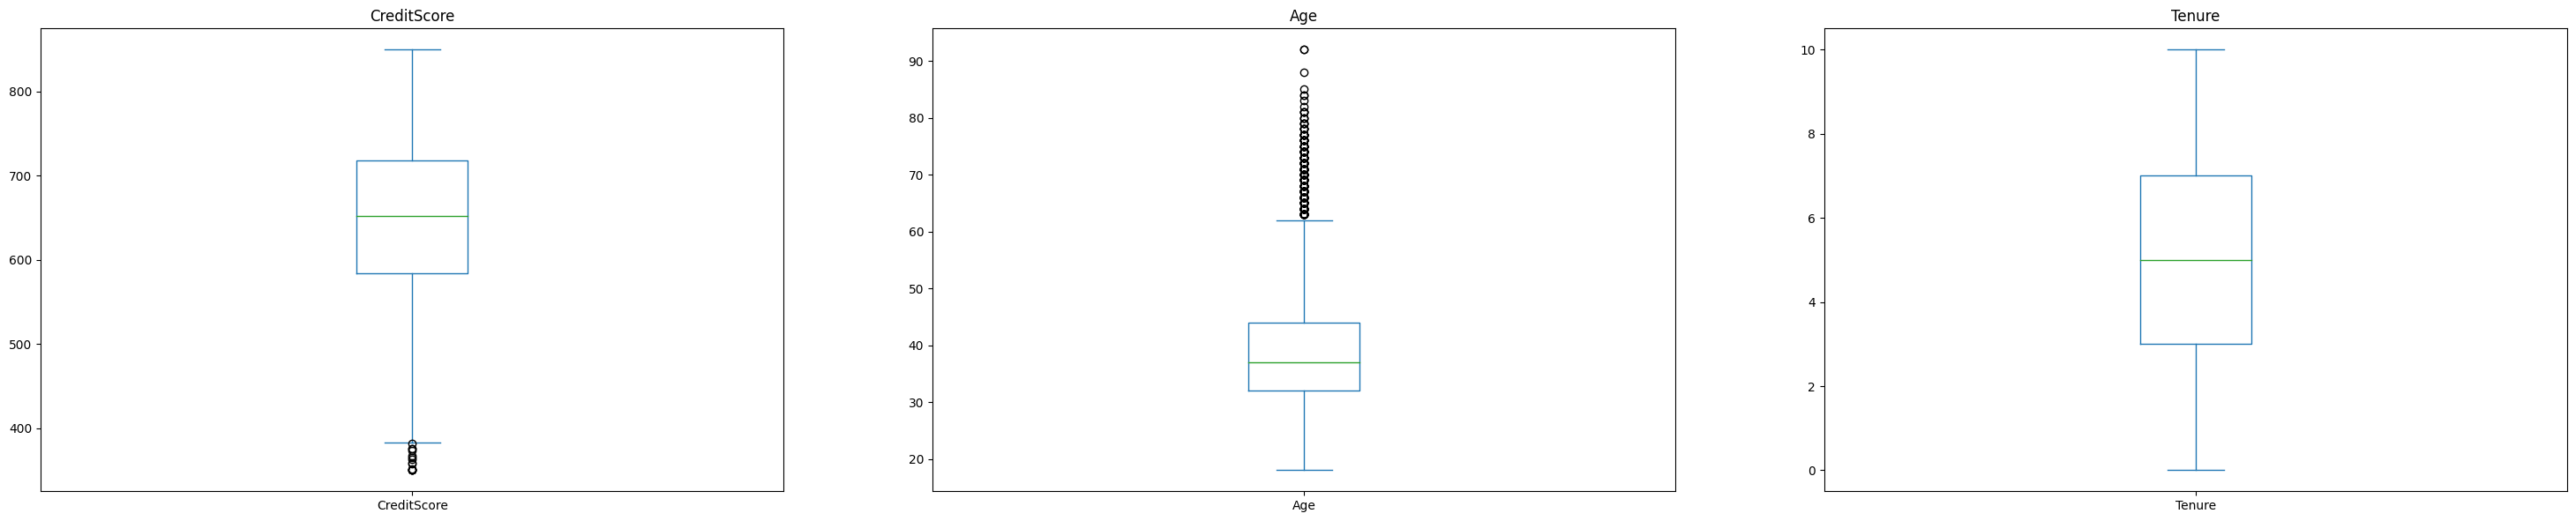

In [286]:
plt.figure(figsize=[50,15])
for ind, col in enumerate(num_cols):
    plt.subplot(2,4,ind+1)
    df[col].plot.box()
    plt.title(col)
plt.show()

<Axes: xlabel='Geography', ylabel='count'>

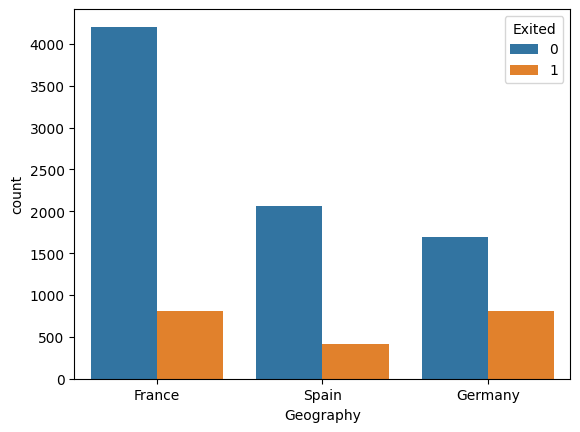

In [287]:
sns.countplot(x='Geography', hue = 'Exited',data = df)

In [288]:
df.groupby('Geography')['Exited'].value_counts(normalize = True)

Geography  Exited
France     0         0.838452
           1         0.161548
Germany    0         0.675568
           1         0.324432
Spain      0         0.833266
           1         0.166734
Name: Exited, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

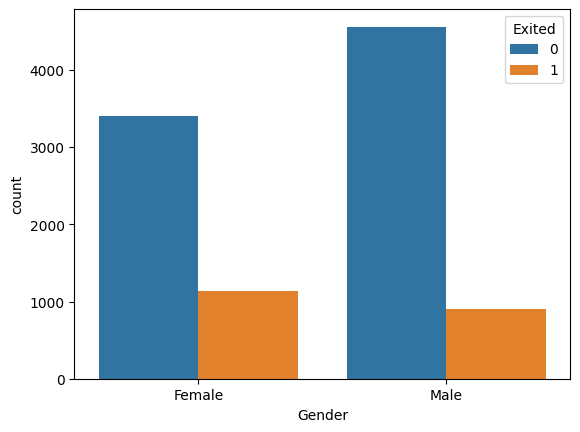

In [289]:
sns.countplot(x='Gender', hue = 'Exited',data = df)

In [290]:
df.groupby('Gender')['Exited'].value_counts(normalize = True)

Gender  Exited
Female  0         0.749285
        1         0.250715
Male    0         0.835441
        1         0.164559
Name: Exited, dtype: float64

<Axes: xlabel='HasCrCard', ylabel='count'>

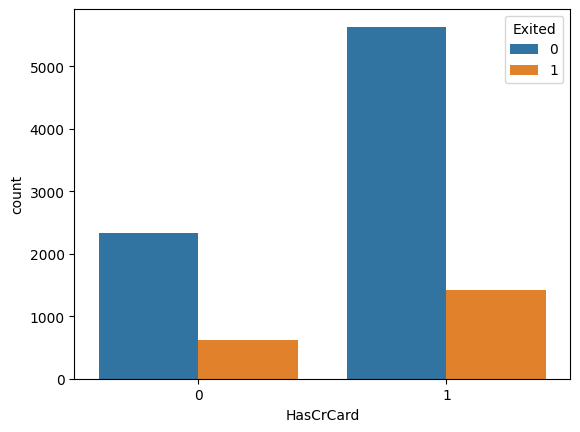

In [291]:
sns.countplot(x='HasCrCard', hue = 'Exited',data = df)

In [292]:
df.groupby('HasCrCard')['Exited'].value_counts(normalize = True)

HasCrCard  Exited
0          0         0.791851
           1         0.208149
1          0         0.798157
           1         0.201843
Name: Exited, dtype: float64

<Axes: xlabel='IsActiveMember', ylabel='count'>

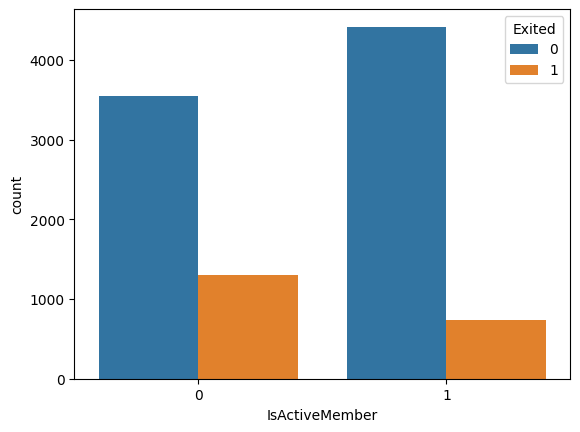

In [293]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

In [294]:
df.groupby('IsActiveMember')['Exited'].value_counts(normalize = True)

IsActiveMember  Exited
0               0         0.731491
                1         0.268509
1               0         0.857309
                1         0.142691
Name: Exited, dtype: float64

Observation from Bivariate Analysis


*   People from Germany have Exited more comapred to other two countries.
*   Female customer are more likely to churn.
*   HasCrCard does not has major impact on churn as both category have 20% churn.
*   Active Member are lee likely to churn.





In Gender column, replacing Female as 0 and Male as 1.

In [295]:
df.Gender = df.Gender.map({'Male':1, 'Female':0})

In [296]:
df.Gender.value_counts(normalize = True)

1    0.5457
0    0.4543
Name: Gender, dtype: float64

## Binning of Credit Score

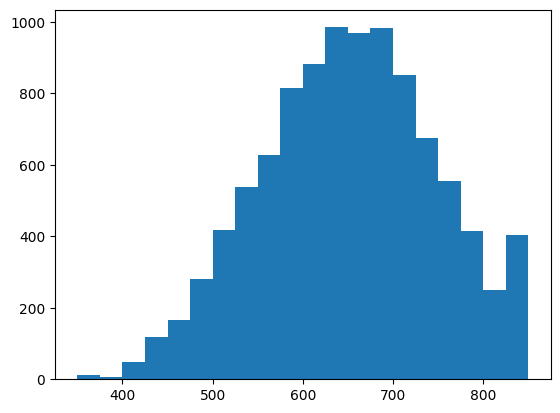

In [297]:
plt.hist(df.CreditScore, bins=20)
plt.show()

In [298]:
bin_manual = [0, 400, 500, 600, 700,800,1000]
labs = ['<400', '400-500','500-600','600-700','700-800','above 800']

In [299]:
df['CreditSc_bin'] = pd.cut(df.CreditScore, bins=bin_manual, labels=labs)

# Creating Dummy Variables

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  int64   
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  CreditSc_bin     10000 non-null  category
dtypes: category(1), float64(2), int64(8), object(1)
memory usage: 869.5+ KB


In [301]:
df.NumOfProducts = df.NumOfProducts.astype('object')

In [302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  object  
 2   Gender           10000 non-null  int64   
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  object  
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  CreditSc_bin     10000 non-null  category
dtypes: category(1), float64(2), int64(7), object(2)
memory usage: 869.5+ KB


Geography, NumOfProducts, HasCrCard, IsActiveMember

In [303]:
dumm_cols = ['Geography','NumOfProducts','CreditSc_bin']

In [304]:
df_dummies = pd.get_dummies(df[dumm_cols])

converting NumOfProducts to int type

In [305]:
df1 = pd.concat([df, df_dummies],axis=1) # combining the dummy df with original df
df1.drop(dumm_cols, axis=1, inplace=True)
df1.drop('CreditScore',axis=1,inplace = True)
df1.shape

(10000, 21)

In [306]:
df1.columns

Index(['Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'NumOfProducts_1', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4', 'CreditSc_bin_<400',
       'CreditSc_bin_400-500', 'CreditSc_bin_500-600', 'CreditSc_bin_600-700',
       'CreditSc_bin_700-800', 'CreditSc_bin_above 800'],
      dtype='object')

converting column NumofProducts to int64

In [307]:
df1.NumOfProducts_2 = df1.NumOfProducts_2.astype('int64')
df1.NumOfProducts_3 = df1.NumOfProducts_3.astype('int64')
df1.NumOfProducts_4 = df1.NumOfProducts_4.astype('int64')

In [308]:
df1.NumOfProducts_1 = df1.NumOfProducts_1.astype('int64')

dropping column NumOfProducts_1 as it can be predicted by other columns

In [309]:
df1.drop('NumOfProducts_1',axis=1,inplace = True)

In [310]:
df1.columns

Index(['Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'CreditSc_bin_<400', 'CreditSc_bin_400-500',
       'CreditSc_bin_500-600', 'CreditSc_bin_600-700', 'CreditSc_bin_700-800',
       'CreditSc_bin_above 800'],
      dtype='object')

In [311]:
df_dummies.shape

(10000, 13)

In [312]:
df1.shape

(10000, 20)

In [313]:
df1.head()

,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,CreditSc_bin_<400,CreditSc_bin_400-500,CreditSc_bin_500-600,CreditSc_bin_600-700,CreditSc_bin_700-800,CreditSc_bin_above 800
0,0,42,2,0.00,1,1,101348.88,1,1,0,0,0,0,0,0,0,0,1,0,0
1,0,41,1,83807.86,0,1,112542.58,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,42,8,159660.80,1,0,113931.57,1,1,0,0,0,1,0,0,0,1,0,0,0
3,0,39,1,0.00,0,0,93826.63,0,1,0,0,1,0,0,0,0,0,1,0,0
4,0,43,2,125510.82,1,1,79084.10,0,0,0,1,0,0,0,0,0,0,0,0,1


In [314]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  10000 non-null  int64  
 1   Age                     10000 non-null  int64  
 2   Tenure                  10000 non-null  int64  
 3   Balance                 10000 non-null  float64
 4   HasCrCard               10000 non-null  int64  
 5   IsActiveMember          10000 non-null  int64  
 6   EstimatedSalary         10000 non-null  float64
 7   Exited                  10000 non-null  int64  
 8   Geography_France        10000 non-null  uint8  
 9   Geography_Germany       10000 non-null  uint8  
 10  Geography_Spain         10000 non-null  uint8  
 11  NumOfProducts_2         10000 non-null  int64  
 12  NumOfProducts_3         10000 non-null  int64  
 13  NumOfProducts_4         10000 non-null  int64  
 14  CreditSc_bin_<400       10000 non-null 

# Train and Test Split

In [315]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df1, test_size=0.2, random_state=42, stratify=df1.Exited)

In [316]:
df_train.Exited.value_counts(normalize = True)

0    0.79625
1    0.20375
Name: Exited, dtype: float64

In [317]:
df_test.Exited.value_counts(normalize = True)

0    0.7965
1    0.2035
Name: Exited, dtype: float64

In [318]:
df_train.shape

(8000, 20)

In [319]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  8000 non-null   int64  
 1   Age                     8000 non-null   int64  
 2   Tenure                  8000 non-null   int64  
 3   Balance                 8000 non-null   float64
 4   HasCrCard               8000 non-null   int64  
 5   IsActiveMember          8000 non-null   int64  
 6   EstimatedSalary         8000 non-null   float64
 7   Exited                  8000 non-null   int64  
 8   Geography_France        8000 non-null   uint8  
 9   Geography_Germany       8000 non-null   uint8  
 10  Geography_Spain         8000 non-null   uint8  
 11  NumOfProducts_2         8000 non-null   int64  
 12  NumOfProducts_3         8000 non-null   int64  
 13  NumOfProducts_4         8000 non-null   int64  
 14  CreditSc_bin_<400       8000 non-null

# MinMax scaling for numeric features

In [320]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [321]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 2151 to 6206
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  8000 non-null   int64  
 1   Age                     8000 non-null   int64  
 2   Tenure                  8000 non-null   int64  
 3   Balance                 8000 non-null   float64
 4   HasCrCard               8000 non-null   int64  
 5   IsActiveMember          8000 non-null   int64  
 6   EstimatedSalary         8000 non-null   float64
 7   Exited                  8000 non-null   int64  
 8   Geography_France        8000 non-null   uint8  
 9   Geography_Germany       8000 non-null   uint8  
 10  Geography_Spain         8000 non-null   uint8  
 11  NumOfProducts_2         8000 non-null   int64  
 12  NumOfProducts_3         8000 non-null   int64  
 13  NumOfProducts_4         8000 non-null   int64  
 14  CreditSc_bin_<400       8000 non-null

In [322]:
df_train[[ 'Age','Tenure','Balance','EstimatedSalary']] = scaler.fit_transform(df_train[[ 'Age','Tenure','Balance','EstimatedSalary']])

In [323]:
df_test[[ 'Age','Tenure','Balance','EstimatedSalary']] = scaler.transform(df_test[[ 'Age','Tenure','Balance','EstimatedSalary']])

# creating X & y variables

In [324]:
X_train = df_train.drop('Exited', axis=1)
y_train = df_train['Exited'] # is the traget variable
X_test = df_test.drop('Exited', axis=1)
y_test = df_test['Exited']

In [325]:
X_train.shape

(8000, 19)

In [326]:
X_test.shape

(2000, 19)

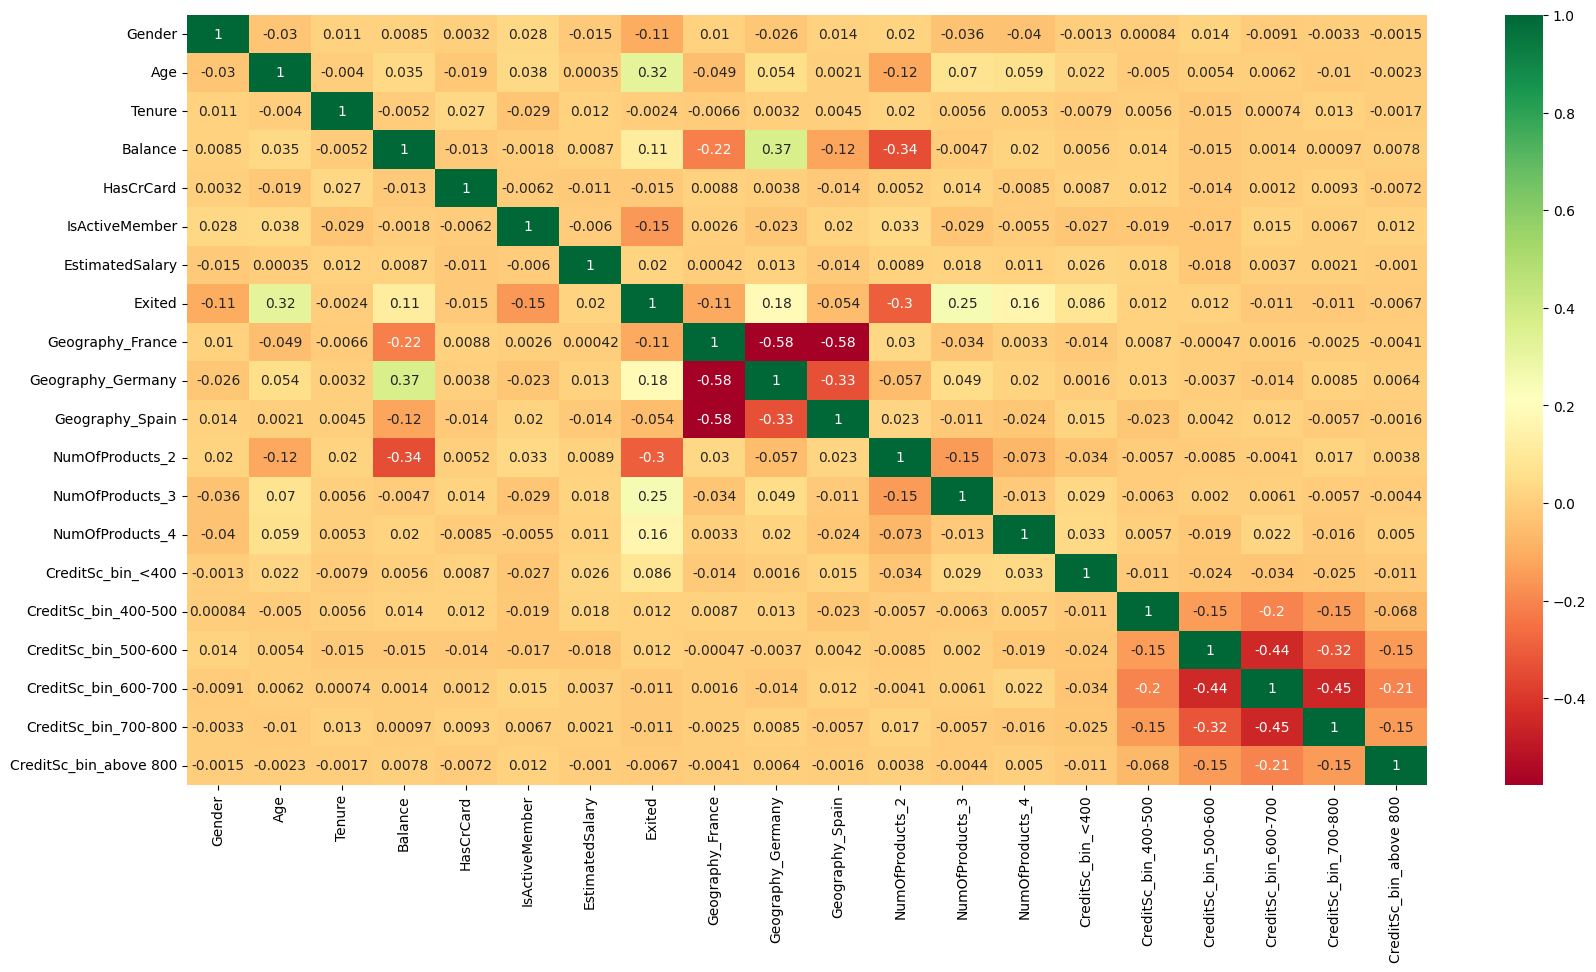

In [327]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df_train.corr(method='spearman'),annot = True,cmap = 'RdYlGn')
plt.show()

# Feature Selection Using RFE

In [328]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [329]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [330]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Gender', True, 1),
 ('Age', True, 1),
 ('Tenure', False, 11),
 ('Balance', False, 8),
 ('HasCrCard', False, 10),
 ('IsActiveMember', True, 1),
 ('EstimatedSalary', False, 9),
 ('Geography_France', False, 6),
 ('Geography_Germany', True, 1),
 ('Geography_Spain', False, 7),
 ('NumOfProducts_2', True, 1),
 ('NumOfProducts_3', True, 1),
 ('NumOfProducts_4', True, 1),
 ('CreditSc_bin_<400', True, 1),
 ('CreditSc_bin_400-500', False, 5),
 ('CreditSc_bin_500-600', False, 4),
 ('CreditSc_bin_600-700', False, 2),
 ('CreditSc_bin_700-800', False, 3),
 ('CreditSc_bin_above 800', True, 1)]

In [331]:
rfe.support_

array([ True,  True, False, False, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False, False, False, False,
        True])

In [332]:
col = X_train.columns[rfe.support_]

In [333]:
col

Index(['Gender', 'Age', 'IsActiveMember', 'Geography_Germany',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4',
       'CreditSc_bin_<400', 'CreditSc_bin_above 800'],
      dtype='object')

# Building the Model

In [334]:
import statsmodels.api as sm

In [335]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Exited   No. Observations:                 8000
Model:                            GLM   Df Residuals:                     7990
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2971.2
Date:                Sat, 27 May 2023   Deviance:                       5942.4
Time:                        06:39:07   Pearson chi2:                 8.17e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2353
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0837      0.091    -22.844      0.000      -2.263      -1.905
Gender                    -0.5055      0.066     -7.678      0.000      -0.635      -0.376
Age                        5.0767      0.226     22.491      0.000       4.634       5.519
IsActiveMember            -1.0553      0.069    -15.231      0.000      -1.191      -0.920
Geography_Germany          0.9383      0.070     13.456      0.000       0.802       1.075
NumOfProducts_2           -1.5369      0.077    -20.050      0.000      -1.687      -1.387
NumOfProducts_3            2.5424      0.201     12.658      0.000       2.149       2.936
NumOfProducts_4           25.3038   1.71e+04      0.001      0.999   -3.34e+04    3.35e+04
CreditSc_bin_<400         25.1139   2.85e+04      0.001      0.999   -5.58e+04    5.58e+04
CreditSc_bin_above 800    -0.1002      0.137     -0.733      0.463      -0.368       0.168
==========================================================================================
"""

In [336]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2151    0.521571
8392    0.333919
5006    0.080602
4117    0.056113
7182    0.107509
3522    0.035439
8783    0.183687
741     0.037946
1319    0.065054
2922    0.183687
dtype: float64

In [337]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.52157071, 0.33391906, 0.08060207, 0.05611266, 0.10750869,
       0.03543942, 0.18368746, 0.03794577, 0.06505351, 0.18368746])

Creating a dataframe with the actual churn flag and the predicted probabilities

In [338]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustomerId'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerId
0,1,0.521571,2151
1,1,0.333919,8392
2,0,0.080602,5006
3,0,0.056113,4117
4,0,0.107509,7182


Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [339]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerId,predicted
0,1,0.521571,2151,1
1,1,0.333919,8392,0
2,0,0.080602,5006,0
3,0,0.056113,4117,0
4,0,0.107509,7182,0


In [340]:
from sklearn import metrics

In [341]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[6114  256]
 [1022  608]]


In [342]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.84025


#### Checking VIFs

In [343]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [344]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,2.73
2,IsActiveMember,1.93
0,Gender,1.89
4,NumOfProducts_2,1.63
3,Geography_Germany,1.29
8,CreditSc_bin_above 800,1.06
5,NumOfProducts_3,1.05
6,NumOfProducts_4,1.02
7,CreditSc_bin_<400,1.01


Calculating other validation parameters

In [345]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [346]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.37300613496932516

sensitivity is low, needs to find optimum cut-off pt

In [347]:
# Let us calculate specificity
TN / float(TN+FP)

0.9598116169544741

In [348]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.040188383045525904


In [349]:
# positive predictive value 
print (TP / float(TP+FP))

0.7037037037037037


In [350]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8567825112107623


# Plotting the ROC Curve

In [351]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [352]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

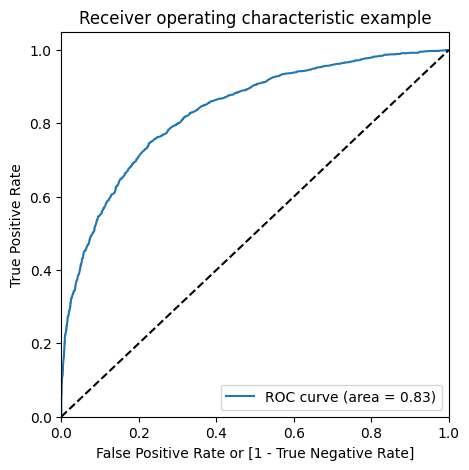

In [353]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Finding Optimal Cutoff Point

In [354]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.521571,2151,1,1,1,1,1,1,1,0,0,0,0
1,1,0.333919,8392,0,1,1,1,1,0,0,0,0,0,0
2,0,0.080602,5006,0,1,0,0,0,0,0,0,0,0,0
3,0,0.056113,4117,0,1,0,0,0,0,0,0,0,0,0
4,0,0.107509,7182,0,1,1,0,0,0,0,0,0,0,0


In [355]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.203750  1.000000  0.000000
0.1   0.1  0.605250  0.889571  0.532496
0.2   0.2  0.756375  0.758282  0.755887
0.3   0.3  0.814625  0.607362  0.867661
0.4   0.4  0.836500  0.482822  0.927002
0.5   0.5  0.840250  0.373006  0.959812
0.6   0.6  0.838125  0.280982  0.980691
0.7   0.7  0.829375  0.194479  0.991837
0.8   0.8  0.819875  0.132515  0.995761
0.9   0.9  0.812375  0.082822  0.999058


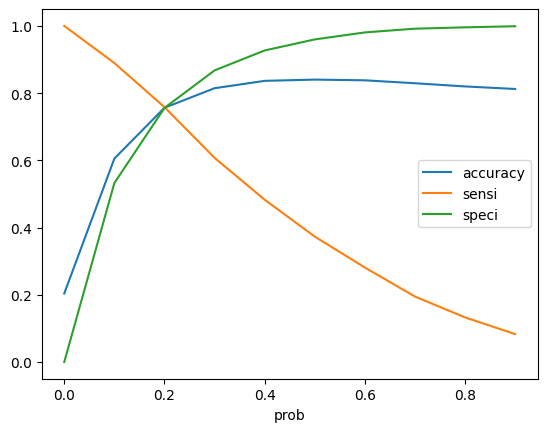

In [356]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

COnsidering cut-off point as 0.2

In [357]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.521571,2151,1,1,1,1,1,1,1,0,0,0,0,1
1,1,0.333919,8392,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.080602,5006,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.056113,4117,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.107509,7182,0,1,1,0,0,0,0,0,0,0,0,0


In [358]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.756375

In [359]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[4815, 1555],
       [ 394, 1236]])

In [360]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [361]:
# Let's see the sensitivity of our logistic regression model
TP2 / float(TP2+FN2)

0.758282208588957

In [362]:
# Let us calculate specificity
TN2 / float(TN2+FP2)

0.7558869701726845

In [363]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP2/ float(TN2+FP2))

0.24411302982731553


In [364]:
# Positive predictive value 
print (TP2 / float(TP2+FP2))

0.4428520243640272


In [365]:
# Negative predictive value
print (TN2 / float(TN2+ FN2))

0.9243616817047418


In [366]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

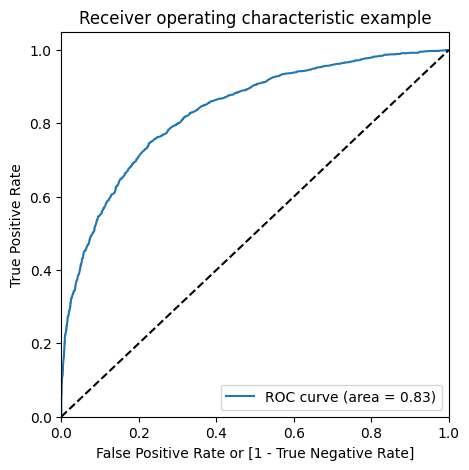

In [367]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Making predictions on the test set

In [368]:
X_test = X_test[col]
X_test.head()

,Gender,Age,IsActiveMember,Geography_Germany,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,CreditSc_bin_<400,CreditSc_bin_above 800
5702,1,0.243243,0,0,1,0,0,0,0
3667,1,0.202703,0,1,1,0,0,0,0
1617,0,0.297297,1,0,1,0,0,0,0
5673,1,0.216216,0,0,1,0,0,0,0
4272,0,0.216216,1,0,0,0,0,0,0


In [369]:
X_test_sm = sm.add_constant(X_test)

In [370]:
y_test_pred = res.predict(X_test_sm)

In [371]:
y_test_pred[:10]

5702    0.052588
3667    0.103511
1617    0.040441
5673    0.046157
4272    0.114927
8270    0.183687
7079    0.031678
5295    0.403519
845     0.386393
5311    0.108000
dtype: float64

In [372]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [373]:
# Let's see the head
y_pred_1.head()

,0
5702,0.052588
3667,0.103511
1617,0.040441
5673,0.046157
4272,0.114927


In [374]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [375]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [376]:
y_test_df

,Exited,CustID
5702,0,5702
3667,0,3667
1617,0,1617
5673,0,5673
4272,0,4272
...,...,...
5768,0,5768
833,0,833
9719,1,9719
2776,0,2776


In [377]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [378]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [379]:
y_pred_final.head()

,Exited,CustID,0
0,0,5702,0.052588
1,0,3667,0.103511
2,0,1617,0.040441
3,0,5673,0.046157
4,0,4272,0.114927


In [380]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [381]:
  # Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Exited','Churn_Prob'], axis=1)

In [382]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Exited,Churn_Prob
0,5702,0,0.052588
1,3667,0,0.103511
2,1617,0,0.040441
3,5673,0,0.046157
4,4272,0,0.114927


In [383]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.2 else 0)

In [384]:
y_pred_final.head()

,CustID,Exited,Churn_Prob,final_predicted
0,5702,0,0.052588,0
1,3667,0,0.103511,0
2,1617,0,0.040441,0
3,5673,0,0.046157,0
4,4272,0,0.114927,0


In [386]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Exited, y_pred_final.final_predicted)

0.7545

In [388]:
confusion3 = metrics.confusion_matrix(y_pred_final.Exited, y_pred_final.final_predicted )
confusion3

array([[1204,  389],
       [ 102,  305]])

In [389]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [390]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.758282208588957

In [391]:
# Let us calculate specificity
TN / float(TN+FP)

0.7558869701726845

Conclusion

Evaluation Parameters by using cut-off at 0.5

Accuracy - 0.84

Sensitivity - 0.37

Specificity - 0.95

After plotting accuracy, sensitivty and specificity, the cut-off point is 0.2

Evaluation parameters based on 0.2 cut-off

Accuracy - 0.75

Sensitivity - 0.75

Specificity -0.75


On Test DataSet with cut-off at 0.2

Accuracy - 0.75

Sensitivity - 0.75

Specificity -0.75




